## Assignment 1 Group 14


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
from tabulate import tabulate

### Task 1
The objective in task 1 is to implemenet four different sorting algorithms and hen visualize the step count as a function of the input size, and check that they match the asymptotic running time correlating to the methods. The methods we're implementing is
- Insertion sort
- Merge sort
- Heap sort
- Quick sort

#### Insertion sort

In [3]:
def InsertionSort(list):
    stepCount = 0

    for i in range(1, len(list)):
        key = list[i]
        j = i - 1
        stepCount += 1

        while j >= 0 and list[j] > key:
            list[j+1] = list[j]
            j -= 1
            stepCount += 1
        
        list[j+1] = key

    return list, stepCount

#### Merge sort

In [4]:
def MergeSort(list):
    # stepCount as an int was not correctly calculated because of recurssion
    stepCount = [0]
    
    def merge_sort(list):
        if len(list) <= 1:
            return list
        
        middle = len(list)//2
        left = merge_sort(list[:middle])
        right = merge_sort(list[middle:])

        return merge(left, right)
    
    def merge(left, right):
        res = []
        i = j = 0

        while i < len(left) and j < len(right):
            stepCount[0] += 1
            #print(left[i], right[j])
            if left[i] < right[j]:
                res.append(left[i])
                i += 1
            else:
                res.append(right[j])
                j += 1
        res.extend(left[i:])
        res.extend(right[j:])
        return res
    
    merge_sort(list)
    return list, stepCount[0]

#### Heap sort

In [5]:
def HeapSort(list):
    stepCount = [0]

    def heapify(arr, n, i):
        largest = i 
        
        #  left index = 2*i + 1
        lI = 2 * i + 1 
        
        # right index = 2*i + 2
        rI = 2 * i + 2  

        # If left child is larger than root
        if lI < n and arr[lI] > arr[largest]:
            largest = lI

        # If right child is larger than largest so far
        if rI < n and arr[rI] > arr[largest]:
            largest = rI

        # If largest is not root
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]  # Swap

            # Recursively heapify the affected sub-tree
            heapify(arr, n, largest)
        stepCount[0] += 1
    
    n = len(list) 

    # Build heap (rearrange array)
    for i in range(n // 2 - 1, -1, -1):
        heapify(list, n, i)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):
    
        # Move root to end
        list[0], list[i] = list[i], list[0] 

        # Call max heapify on the reduced heap
        heapify(list, i, 0)
        stepCount[0] += 1

    return list, stepCount

#### Quick sort

In [6]:
def QuickSort(list):
    stepCount = [0]
    def quick_sort(array):
        if len(array) <= 1:
            return array
        
        pivot = array[len(array) // 2]
        left = [x for x in array if x < pivot]
        middle = [x for x in array if x == pivot]
        right = [x for x in array if x > pivot]

        stepCount[0] += len(array) - 1

        return quick_sort(left) + middle + (right)
    
    quick_sort(list)
    return list, stepCount[0]

#### Execution

In [7]:
def collectStepCounts(maxN):
    sortStepDict = {
        "InsertionSort": {"random": [], "worst": []},
        "MergeSort": {"random": [], "worst": []},
        "HeapSort": {"random": [], "worst": []},
        "QuickSort": {"random": [], "worst": []},
        "nCount": []
    }
    
    for n in range(1, maxN + 1, 10):
        #Randomized list
        randList = [random.randint(0, 1000) for _ in range(n)]
        _, stepCountIns = InsertionSort(randList[:])
        _, stepCountMerge = MergeSort(randList[:])
        _, stepCountHeap = HeapSort(randList[:])
        _, stepCountQuick = QuickSort(randList[:])

        sortStepDict["InsertionSort"]["random"].append(stepCountIns)
        sortStepDict["MergeSort"]["random"].append(stepCountMerge)
        sortStepDict["HeapSort"]["random"].append(stepCountHeap)
        sortStepDict["QuickSort"]["random"].append(stepCountQuick)

        #Worst case list
        worstCase = list(range(n, 0, -1))
        _, stepCountIns = InsertionSort(worstCase[:])
        worstCase = worstCaseMergeSort(n)
        _, stepCountMerge = MergeSort(worstCase[:])
        _, stepCountHeap = HeapSort(worstCase[:])
        worstCase = list(range(1, n + 1))
        _, stepCountQuick = QuickSort(worstCase[:])

        sortStepDict["InsertionSort"]["worst"].append(stepCountIns)
        sortStepDict["MergeSort"]["worst"].append(stepCountMerge)
        sortStepDict["HeapSort"]["worst"].append(stepCountHeap)
        sortStepDict["QuickSort"]["worst"].append(stepCountQuick)

        sortStepDict["nCount"].append(n)
    return sortStepDict

def worstCaseMergeSort(maxN):
    result = []
    left, right = 1, maxN
    while left < right:
        result.append(right)
        result.append(left)
        right -= 1
        left += 1
    if maxN % 2 == 1:  # If max_n is odd, append the middle element
        result.append(left)
    return result

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
12


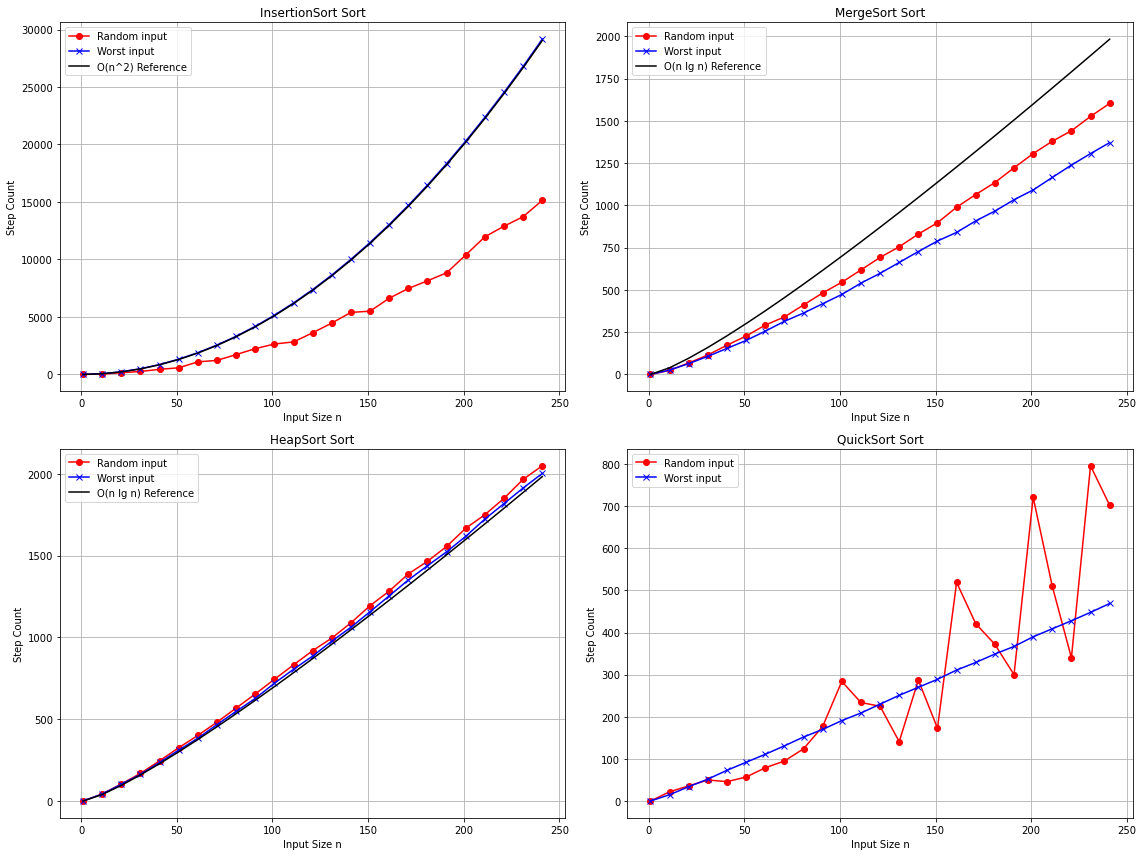

In [12]:
unSortedList = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
stepDict = collectStepCounts(250)

sortedList, steps = QuickSort(unSortedList)
print(sortedList)
print(steps)

# Plot
listSizes = stepDict["nCount"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sortAlgos = ["InsertionSort", "MergeSort", "HeapSort", "QuickSort"]

for axis, algo in zip(axs.flat, sortAlgos):
    randomCase = stepDict[algo]["random"]
    worstCase = stepDict[algo]["worst"]
    
    axis.plot(listSizes, randomCase, label="Random input", color="red", marker="o")
    axis.plot(listSizes, worstCase, label="Worst input", color="blue", marker="x")
    if algo in ["InsertionSort"]:
        axis.plot(listSizes, [0.5 * n**2 for n in listSizes], label="O(n^2) Reference", color="black")
    elif algo in ["MergeSort", "HeapSort"]:
        axis.plot(listSizes, [1.5*(n*np.log(n)) for n in listSizes], label="O(n lg n) Reference", color="black")

    axis.set_title(f"{algo} Sort")
    axis.set_xlabel("Input Size n")
    axis.set_ylabel("Step Count")
    axis.legend()
    axis.grid()

plt.tight_layout()
plt.show()

### Task 2 compare true execution time

In [13]:
nArray = [50, 100, 250, 500, 750, 1000, 2000, 5000]
nTimeElapsed = []

for n in nArray:
    list = [random.randint(0, 1000) for _ in range(n)]

    startTime = time.time()
    InsertionSort(list)
    endTime = time.time()
    nTimeElapsed.append(endTime - startTime)
    print(f"Insertion sort in python used a total of {(endTime - startTime)* 1000:.4f}ms with n = {n}")

i = 0
for nTime in nTimeElapsed:
    nTimeElapsed[i] = f"{(nTime * 1000):.4f}"
    i += 1

Insertion sort in python used a total of 0.0758ms with n = 50
Insertion sort in python used a total of 0.2999ms with n = 100
Insertion sort in python used a total of 1.7872ms with n = 250
Insertion sort in python used a total of 7.2310ms with n = 500
Insertion sort in python used a total of 15.8000ms with n = 750
Insertion sort in python used a total of 24.6820ms with n = 1000
Insertion sort in python used a total of 102.6917ms with n = 2000
Insertion sort in python used a total of 662.4541ms with n = 5000


**Go execution times**

Go Insertion Sort Time: 0.0231 ms with n=50

Go Insertion Sort Time: 0.0046 ms with n=100

Go Insertion Sort Time: 0.0240 ms with n=250

Go Insertion Sort Time: 0.0829 ms with n=500

Go Insertion Sort Time: 0.1787 ms with n=750

Go Insertion Sort Time: 0.3045 ms with n=1000

Go Insertion Sort Time: 1.0680 ms with n=2000

Go Insertion Sort Time: 6.2422 ms with n=5000

In [14]:
goTimeElapsed = [0.0231, 0.0046, 0.0240, 0.0829, 0.1787, 0.3045, 1.0680, 6.2422]
originalRecordedPytonTimes = [0.0758, 0.2999, 1.7872, 7.2310, 15.8000, 24.6820, 102.6917, 662.4541]
df = pd.DataFrame({
    "n": nArray,
    "Python Time (ms)": nTimeElapsed,
    "Go Time (ms)": goTimeElapsed,
})
print(tabulate(df, headers="keys", tablefmt="pretty"))

+---+------+------------------+--------------+
|   |  n   | Python Time (ms) | Go Time (ms) |
+---+------+------------------+--------------+
| 0 |  50  |      0.0758      |    0.0231    |
| 1 | 100  |      0.2999      |    0.0046    |
| 2 | 250  |      1.7872      |    0.024     |
| 3 | 500  |      7.2310      |    0.0829    |
| 4 | 750  |     15.8000      |    0.1787    |
| 5 | 1000 |     24.6820      |    0.3045    |
| 6 | 2000 |     102.6917     |    1.068     |
| 7 | 5000 |     662.4541     |    6.2422    |
+---+------+------------------+--------------+


**Differences between Go and Python implementations:**

Looking at the different true runtime simulations for python and go it is easy to determine that go provides a significant performance boost in true execution time. Where python exceeds 100ms at 2000 steps go reaches just above 1ms. While time difference at this "low" scale doesnt make a huge difference, true execution time scales fast as BigO approaces O^2